In [1]:
%config Completer.use_jedi = False
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib
import glob

def rcparams(r=0.5):
    matplotlib.rcParams['font.size'] = 25 * r
    matplotlib.rcParams['xtick.labelsize'] = 20 * r
    matplotlib.rcParams['ytick.labelsize'] = 20 * r
    matplotlib.rcParams['axes.labelsize'] = 25 * r
    matplotlib.rcParams['legend.title_fontsize'] = 17 * r
    matplotlib.rcParams['legend.fontsize'] = 17 * r
    matplotlib.rcParams['axes.axisbelow'] = True
    matplotlib.rcParams['figure.figsize'] = [6 * r, 6 * r]

rcparams()

# format axis
def format_axis(ax):
    from matplotlib.ticker import (AutoMinorLocator)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3)
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1.5)


In [7]:
def cnn2d(shape, num_filters):
    """
    2D CNN model.
    :param shape: tuple, shape of the input, e.g. (25, 25, 2).
    :param num_filters: int, number of convolutional filters in each layer.
    :return: Keras model.
    """
    np.random.seed(0)
    tf.random.set_seed(0)
    inputs = layers.Input(shape)
    x = layers.Conv2D(num_filters, 3, activation='relu')(inputs)
    x = layers.Conv2D(num_filters, 3, activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(num_filters, 3, activation='relu')(x)
    x = layers.Conv2D(num_filters, 3, activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Flatten()(x)
    for _ in range(3):
        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(14, activation='softmax')(x)
    model = keras.Model(inputs, outputs, name='2dcnn')
    return model

In [8]:
def cnn1d(shape, num_filters):
    """
    1D CNN model.
    :param shape: tuple, shape of the input, e.g. (1600, 1).
    :param num_filters: int, number of convolutional filters in each layer.
    :return: Keras model.
    """
    np.random.seed(0)
    tf.random.set_seed(0)
    inputs = layers.Input(shape)
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv1D(num_filters, 3, activation='relu')(x)
    x = layers.Conv1D(num_filters, 3, activation='relu')(x)
    x = layers.MaxPool1D()(x)
    x = layers.Conv1D(num_filters, 3, activation='relu')(x)
    x = layers.Conv1D(num_filters, 3, activation='relu')(x)
    x = layers.MaxPool1D()(x)
    x = layers.Flatten()(x)
    for _ in range(3):
        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(14, activation='softmax')(x)
    model = keras.Model(inputs, outputs, name='1dcnn')
    return model

In [15]:
for shape in [25, 50, 75, 100]:
    for num_filters in [16, 32, 64]:
        model = cnn2d(shape=(shape, shape, 2), num_filters=num_filters)
        n_params = model.count_params()
        ratio = n_params / (70000 * 0.56)
        print(*[n_params, ratio], sep=',')

25774,0.6574999999999999
56078,1.4305612244897956
158158,4.034642857142856
99502,2.538316326530612
203534,5.192193877551019
453070,11.557908163265305
246958,6.299948979591836
498446,12.715459183673467
1042894,26.6044387755102
512174,13.06566326530612
1028878,26.246887755102037
2103758,53.66729591836734


In [16]:
for shape in [1600]:
    for num_filters in [16, 32, 64]:
        model = cnn1d(shape=(shape, 1), num_filters=num_filters)
        n_params = model.count_params()
        ratio = n_params / (70000 * 0.56)
        print(*[n_params, ratio], sep=',')

418242,10.669438775510201
831794,21.219234693877546
1672722,42.67147959183673


In [25]:
empty_name = []
for k in range(1, 6):
    for image_size in [0, 25, 50, 75, 100]:
        for learning_rate in [0.0005, 0.001, 0.005]:
            for batch_size in [64, 128, 256]:
                for model_checkpoint in ['loss', 'acc']:
                    for num_filters in [16, 32, 64]:
                        name = f'fast_wtih_pc_{k}_{image_size}_{learning_rate}_{batch_size}_{model_checkpoint}_{num_filters}'
                        file = glob.glob(f'/Users/sjiang87/machinelearning2/plastic/result/2nd/{name}.pickle')
                        if len(file) == 0:
                            empty_name.append(name)

In [24]:
len(empty_name)

60

In [22]:
file = glob.glob(f'/Users/sjiang87/machinelearning2/plastic/result/2nd/*.pickle')
len(file)

1050

In [67]:
myfile = open('cnn_left.txt', 'w')
for image_size in [0, 25, 50, 75, 100]:
    for learning_rate in [0.0005, 0.001, 0.005]:
        for batch_size in [64, 128, 256]:
            for model_checkpoint in ['loss', 'acc']:
                for num_filters in [16, 32, 64]:
                    name = f'fast_wtih_pc_{k}_{image_size}_{learning_rate}_{batch_size}_{model_checkpoint}_{num_filters}'
                    file = glob.glob(f'/Users/sjiang87/machinelearning2/plastic/result/2nd/{name}.pickle')
                    if len(file) == 0:
                        name2 = f'{learning_rate}, {batch_size}, {model_checkpoint}, {num_filters}, {image_size}\n'
                        myfile.write(name2)
myfile.close()

In [72]:

import numpy as np
acc = 0
name = 0
for learning_rate in [0.0005, 0.001, 0.005]:
    for batch_size in [64, 128, 256]:
        for model_checkpoint in ['loss', 'acc']:
            for num_filters in [16, 32, 64]:
                files = glob.glob(RESULT_DIR + f'fast_wtih_pc_*_0_{learning_rate}_{batch_size}_{model_checkpoint}_{num_filters}.pickle')
                y_trues = []
                y_preds = []
                for file in files:
                    with open(file, 'rb') as handle:
                        y_true = pickle.load(handle)
                        y_pred = pickle.load(handle)
                        hist = pickle.load(handle)
                    y_true = np.argmax(y_true, axis=1)
                    y_trues.append(y_true)
                    y_preds.append(y_pred)
                y_true = np.ravel(y_trues)
                y_pred = np.ravel(y_preds)
                acc_temp = skm.accuracy_score(y_true, y_pred)
                if acc_temp > acc:
                    acc = acc_temp
                    name = files[0]
print(acc)
print(name)

0.9996571428571429
/Users/sjiang87/machinelearning2/plastic/result/2nd/fast_wtih_pc_1_0_0.0005_256_loss_16.pickle


In [61]:
acc

0.9923142857142857

In [51]:
skm.accuracy_score(y_true, y_pred)

0.9989285714285714

In [52]:
import matplotlib.pyplot as plt

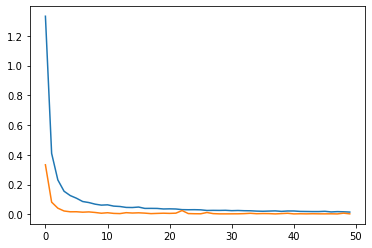

In [53]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])